In [1]:
# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer 

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (440833, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (64374, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
# 1. Basic Data Exploration:
print("Train DataFrame Info:")
train_df.info()
print("\nTest DataFrame Info:")
test_df.info()

print("\nTrain DataFrame Describe:")
train_df.describe().T.to_markdown(numalign="left", stralign="left")

print("\nTest DataFrame Describe:")
test_df.describe().T.to_markdown(numalign="left", stralign="left")

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB

Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns

'|                  | count   | mean     | std      | min   | 25%     | 50%     | 75%     | max   |\n|:-----------------|:--------|:---------|:---------|:------|:--------|:--------|:--------|:------|\n| CustomerID       | 64374   | 32187.5  | 18583.3  | 1     | 16094.2 | 32187.5 | 48280.8 | 64374 |\n| Age              | 64374   | 41.971   | 13.9249  | 18    | 30      | 42      | 54      | 65    |\n| Tenure           | 64374   | 31.9948  | 17.0982  | 1     | 18      | 33      | 47      | 60    |\n| Usage Frequency  | 64374   | 15.0802  | 8.81647  | 1     | 7       | 15      | 23      | 30    |\n| Support Calls    | 64374   | 5.40069  | 3.114    | 0     | 3       | 6       | 8       | 10    |\n| Payment Delay    | 64374   | 17.134   | 8.85221  | 0     | 10      | 19      | 25      | 30    |\n| Total Spend      | 64374   | 541.023  | 260.875  | 100   | 313     | 534     | 768     | 1000  |\n| Last Interaction | 64374   | 15.4989  | 8.63844  | 1     | 8       | 15      | 23      | 30    |\

In [5]:
# 2. Check for Missing Values:
imputer_numerical = SimpleImputer(strategy='mean')  # Or 'median', 'most_frequent' as needed
imputer_categorical = SimpleImputer(strategy='most_frequent') #Impute with mode for categorical features

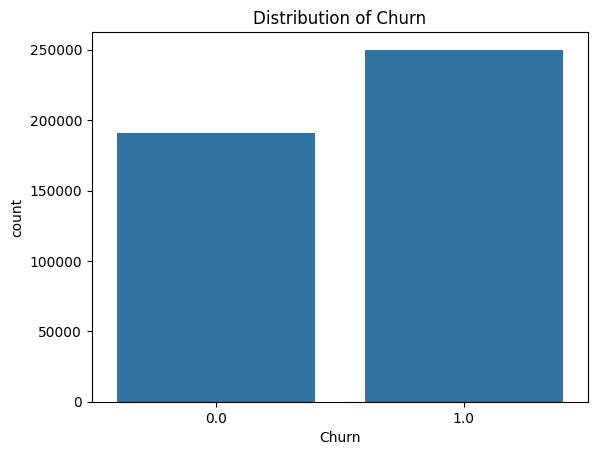

Churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64


In [6]:
# 3. Analyze the Target Variable 'Churn':
sns.countplot(x='Churn', data=train_df)
plt.title('Distribution of Churn')
plt.show()
print(train_df['Churn'].value_counts(normalize=True) * 100)


Value Counts for Gender in Train:
Gender
Male      250252
Female    190580
Name: count, dtype: int64

Value Counts for Gender in Test:
Gender
Female    34353
Male      30021
Name: count, dtype: int64


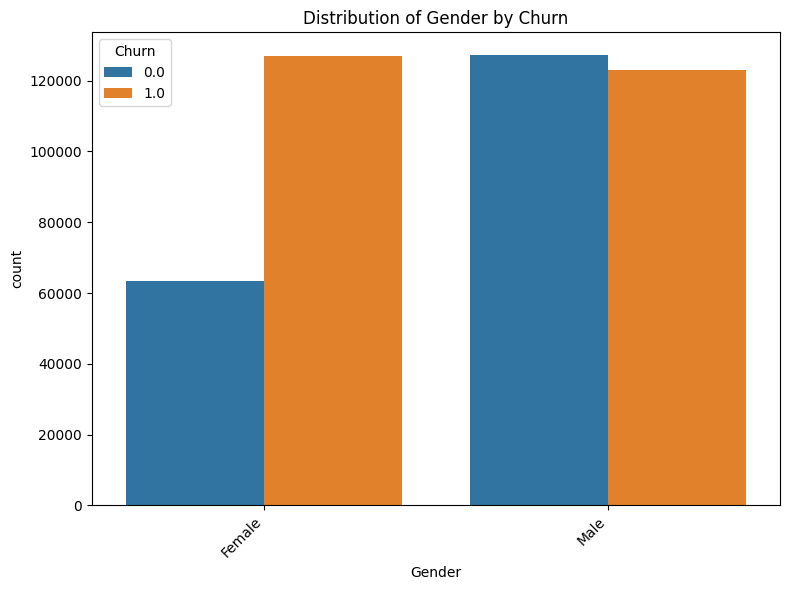


Value Counts for Subscription Type in Train:
Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

Value Counts for Subscription Type in Test:
Subscription Type
Standard    21502
Basic       21451
Premium     21421
Name: count, dtype: int64


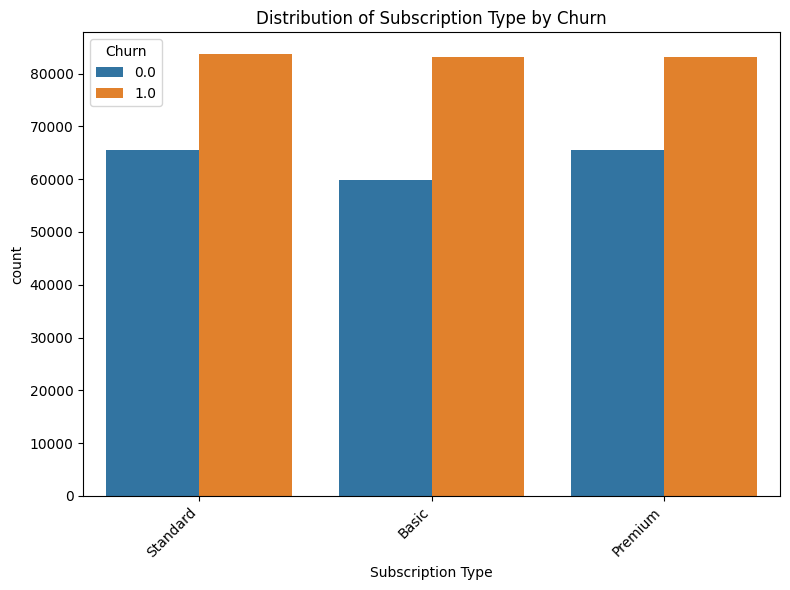


Value Counts for Contract Length in Train:
Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

Value Counts for Contract Length in Test:
Contract Length
Monthly      22130
Annual       21410
Quarterly    20834
Name: count, dtype: int64


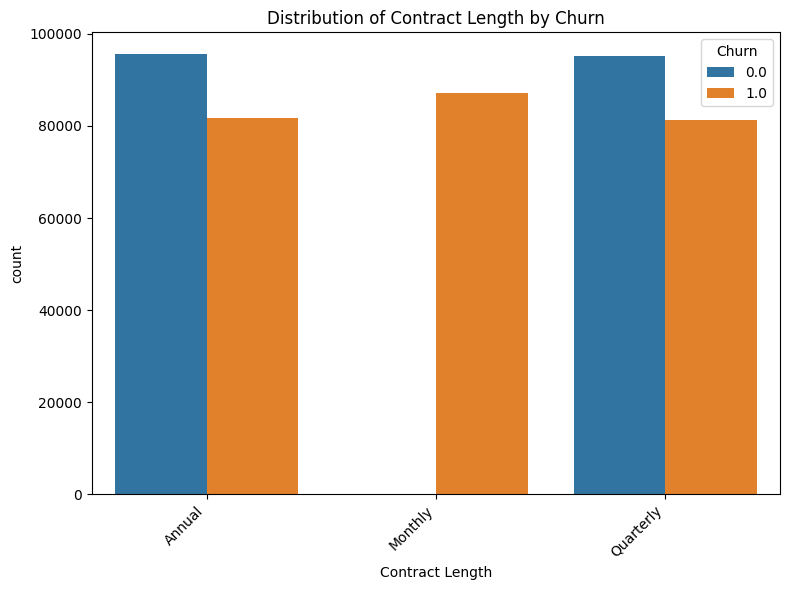

In [7]:
# 4. Explore Categorical Features:
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col} in Train:")
    print(train_df[col].value_counts())
    if col in test_df.columns: #To avoid error if column not in test_df
        print(f"\nValue Counts for {col} in Test:")
        print(test_df[col].value_counts())
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=train_df, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


Distribution of Age:


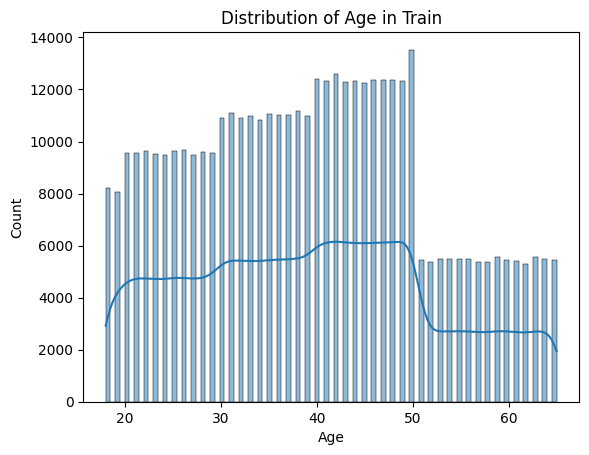

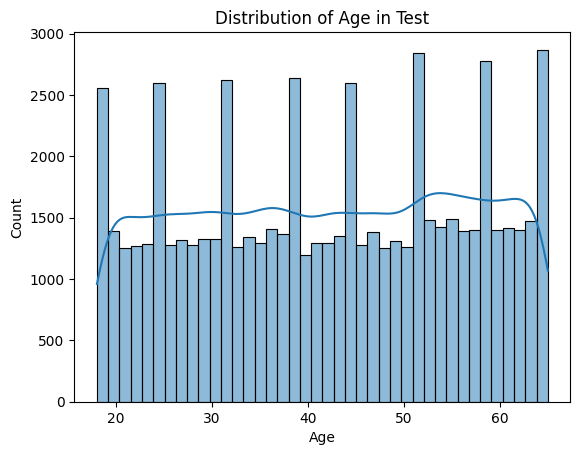

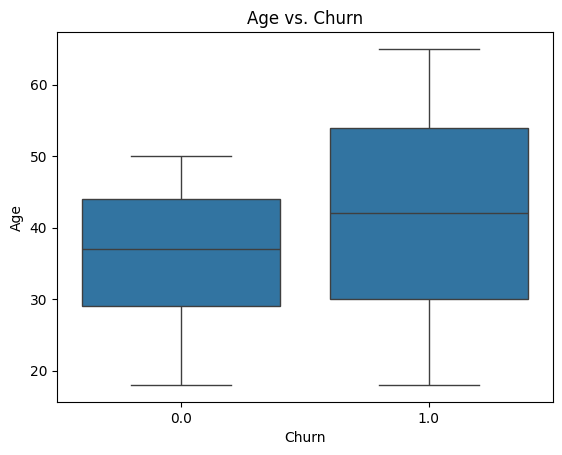


Distribution of Tenure:


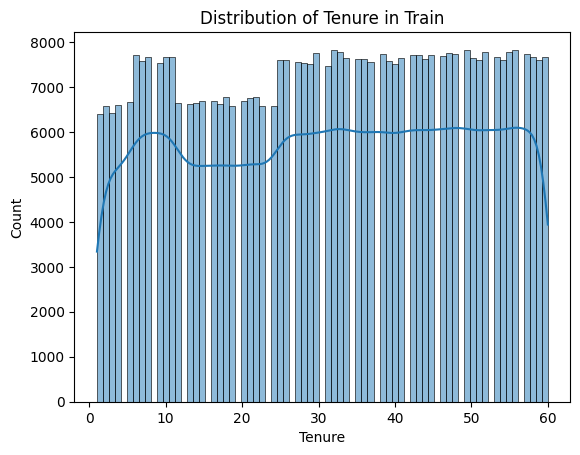

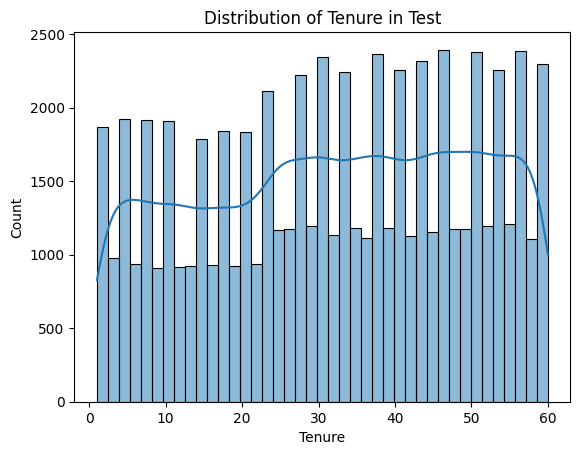

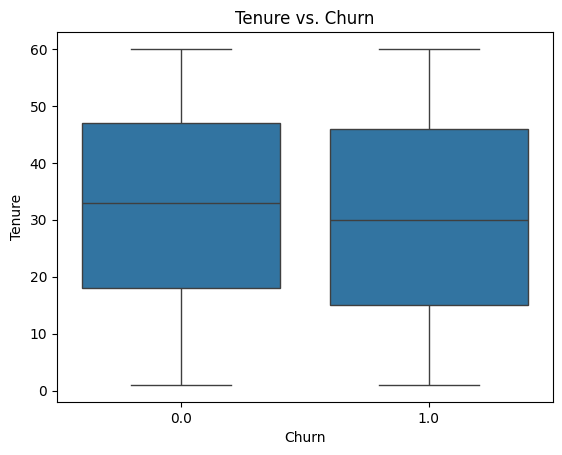


Distribution of Usage Frequency:


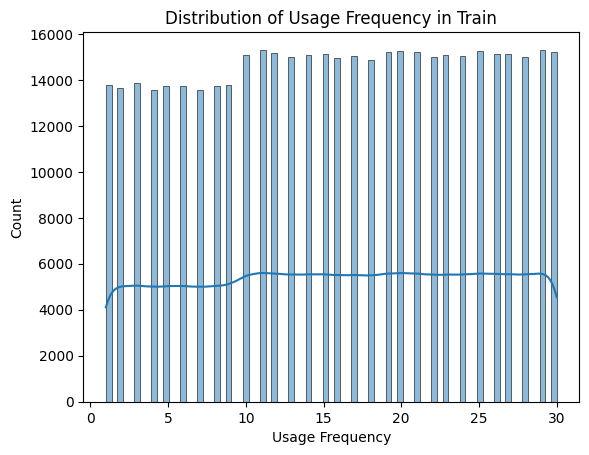

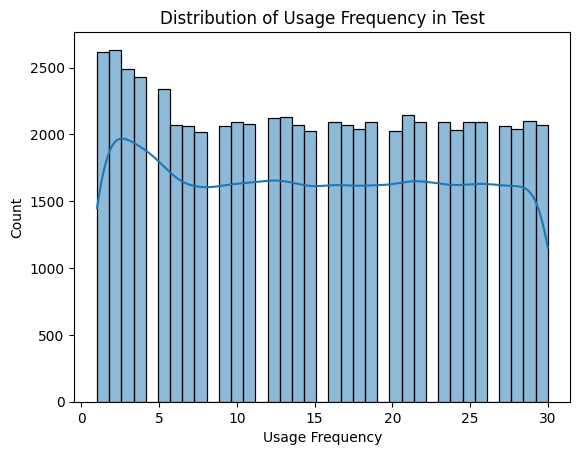

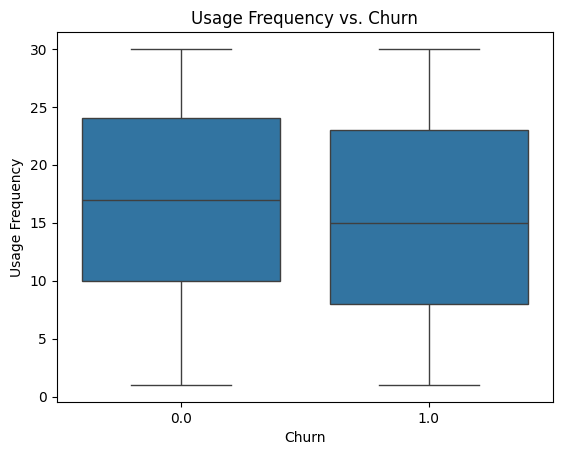


Distribution of Support Calls:


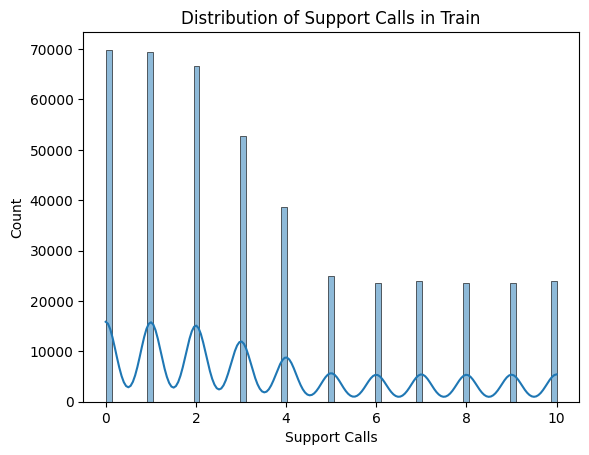

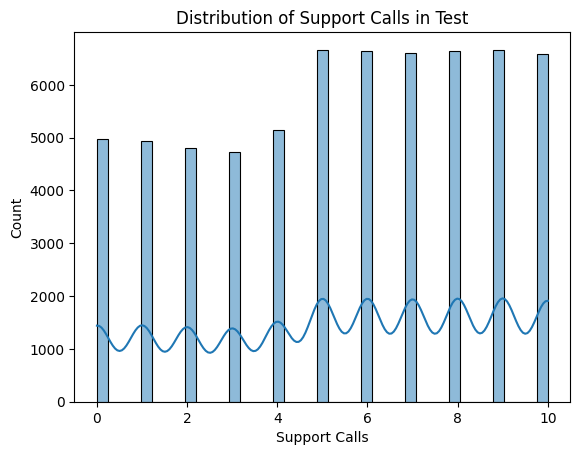

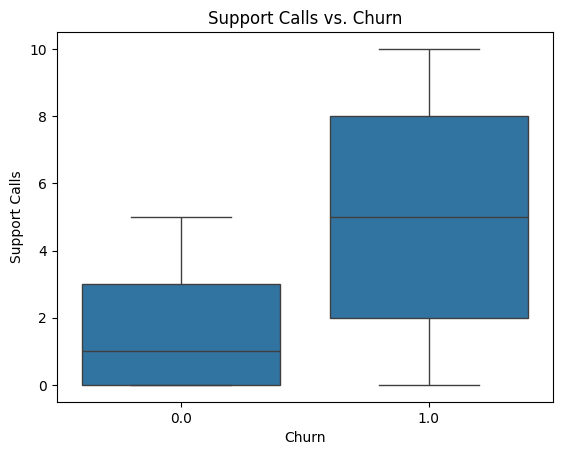


Distribution of Payment Delay:


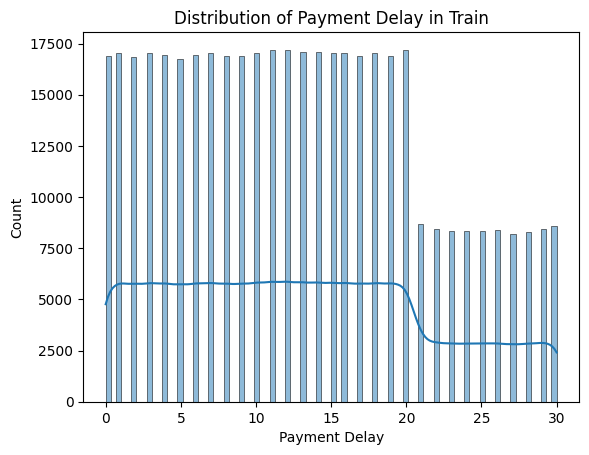

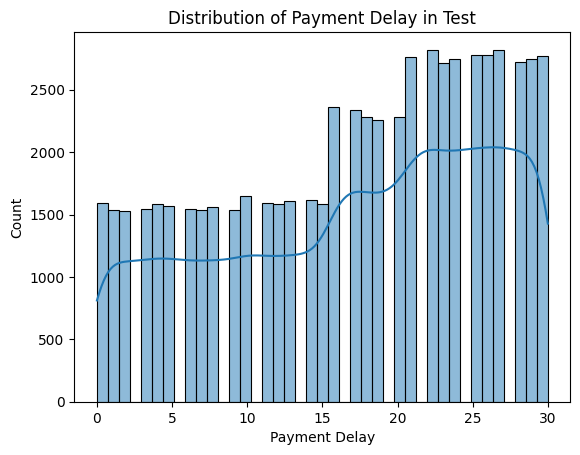

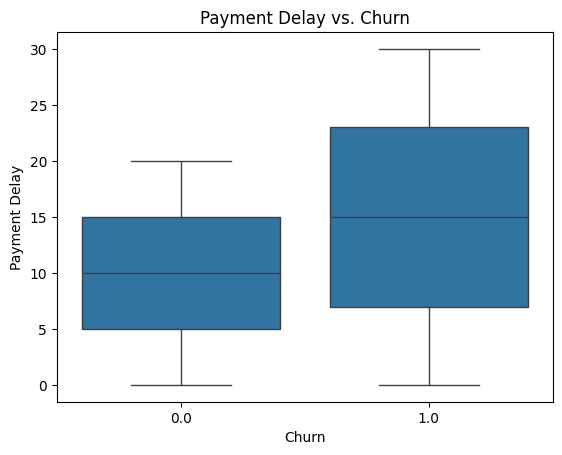


Distribution of Total Spend:


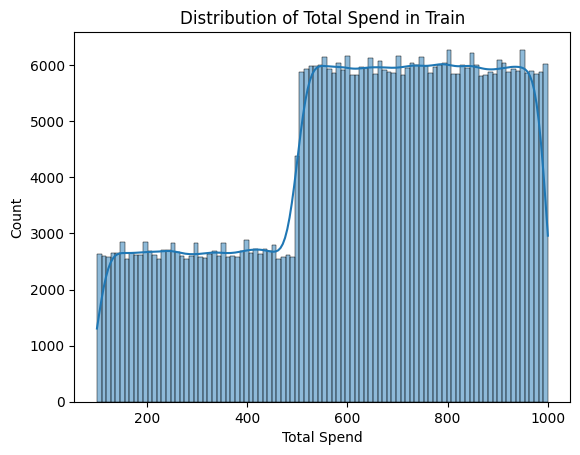

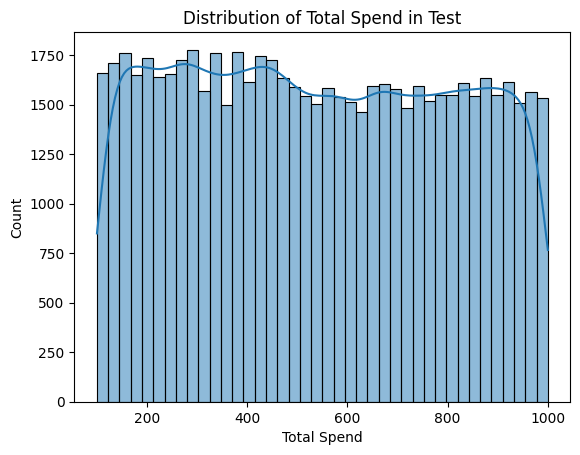

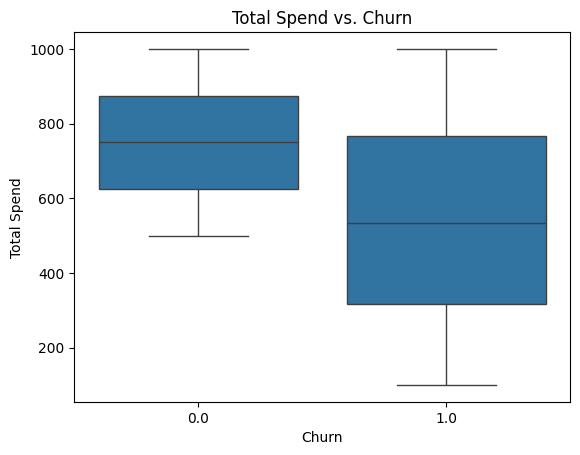


Distribution of Last Interaction:


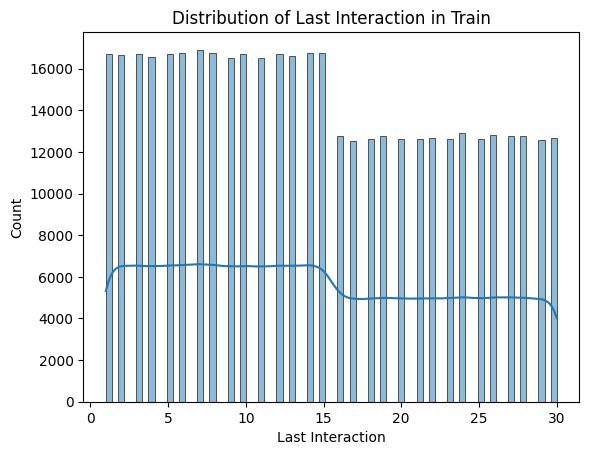

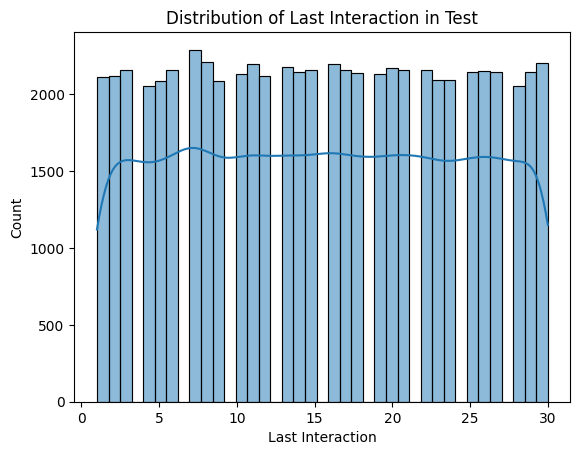

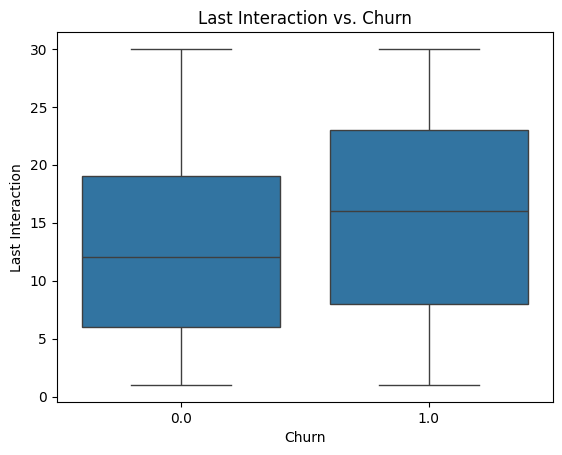


Distribution of Churn:


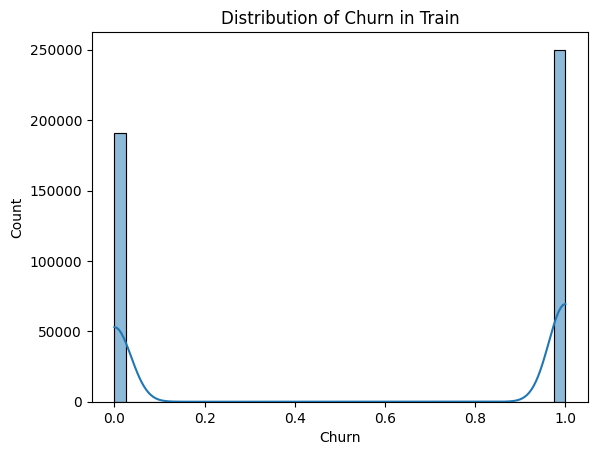

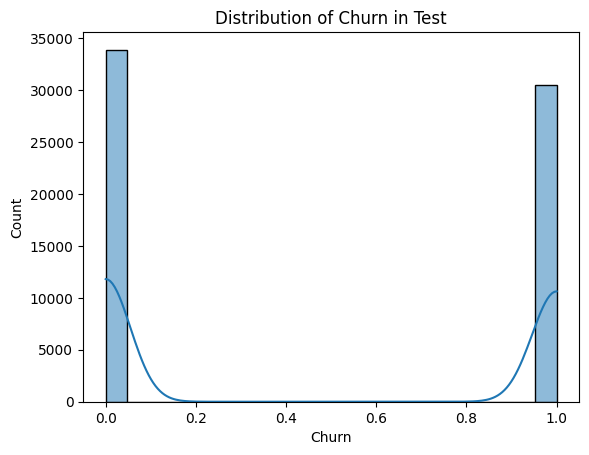

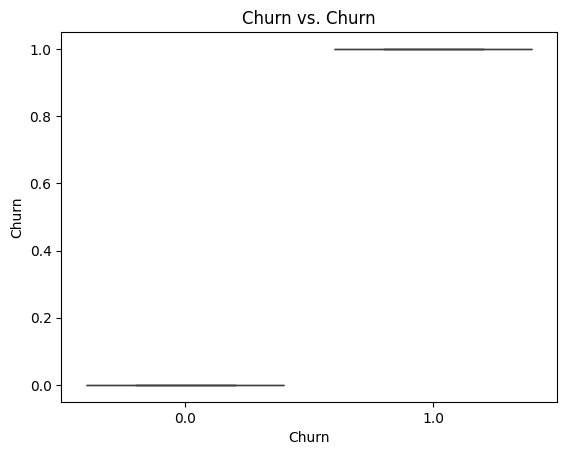

In [8]:
# 5. Explore Numerical Features:
numerical_cols = train_df.select_dtypes(include=np.number).columns.drop('CustomerID') #CustomerID is excluded
for col in numerical_cols:
    print(f"\nDistribution of {col}:")
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col} in Train')
    plt.show()
    if col in test_df.columns:
        sns.histplot(test_df[col], kde=True)
        plt.title(f'Distribution of {col} in Test')
        plt.show()
    sns.boxplot(x='Churn', y=col, data=train_df)
    plt.title(f'{col} vs. Churn')
    plt.show()
    
numerical_cols_train = train_df.select_dtypes(include=np.number).columns
numerical_cols_test = test_df.select_dtypes(include=np.number).columns

train_df[numerical_cols_train] = imputer_numerical.fit_transform(train_df[numerical_cols_train])
test_df[numerical_cols_test] = imputer_numerical.transform(test_df[numerical_cols_test])


In [9]:
# 6. Encode Categorical Variables (One-Hot Encoding with careful handling)
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Get dummies for train and test separately
    train_dummies = pd.get_dummies(train_df[col], prefix=col, drop_first=True)
    test_dummies = pd.get_dummies(test_df[col], prefix=col, drop_first=True)

    # Align columns - this is the CRUCIAL step
    train_dummies, test_dummies = train_dummies.align(test_dummies, join='outer', axis=1, fill_value=0)

    # Concatenate with the original dataframes and drop the original column
    train_df = pd.concat([train_df, train_dummies], axis=1)
    test_df = pd.concat([test_df, test_dummies], axis=1)
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

In [10]:
# 7. Impute Categorical Features (after one-hot encoding)
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_dummies = pd.get_dummies(train_df[col], prefix=col, drop_first=True)
    test_dummies = pd.get_dummies(test_df[col], prefix=col, drop_first=True)

    train_dummies, test_dummies = train_dummies.align(test_dummies, join='outer', axis=1, fill_value=0)

    train_df = pd.concat([train_df, train_dummies], axis=1)
    test_df = pd.concat([test_df, test_dummies], axis=1)
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)


#Impute after one-hot encoding
for col in train_df.columns:
    if train_df[col].isnull().any():
        train_df[col] = imputer_categorical.fit_transform(train_df[[col]])
for col in test_df.columns:
    if test_df[col].isnull().any():
        test_df[col] = imputer_categorical.transform(test_df[[col]])

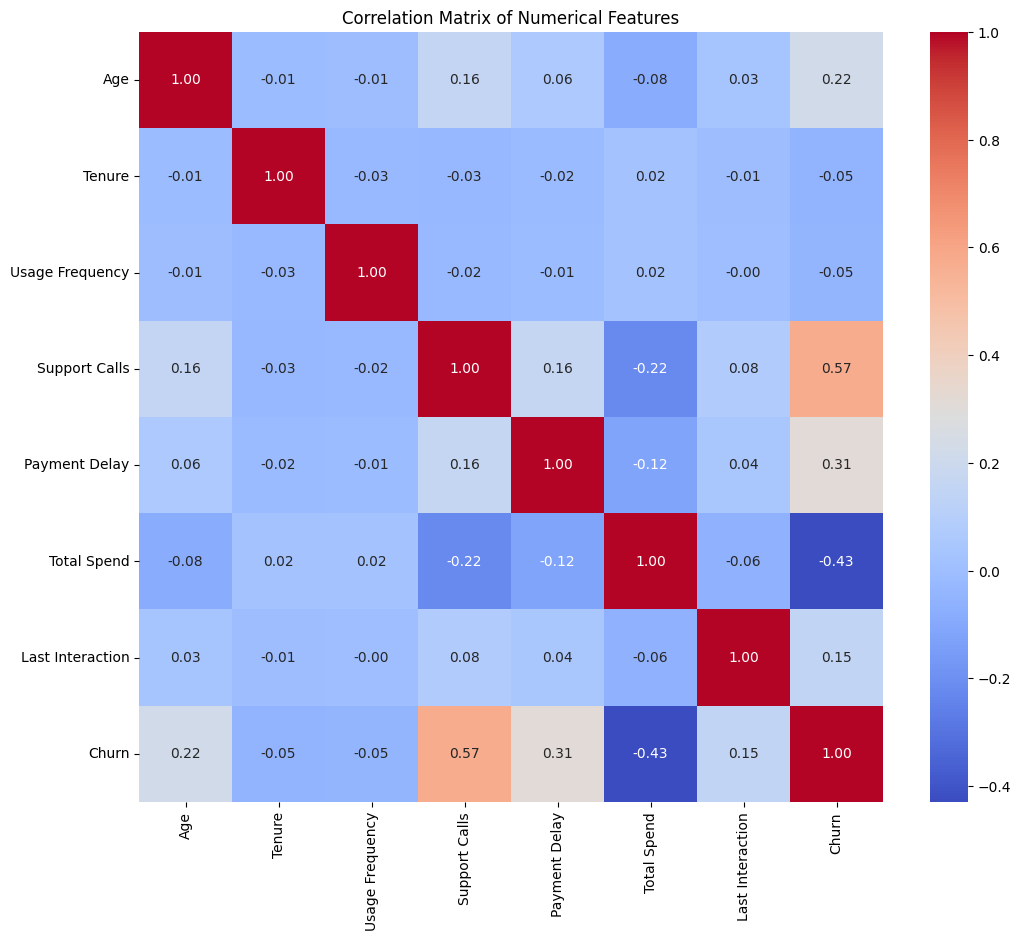

In [11]:
# 8. Correlation Analysis (Numerical Features):
correlation_matrix = train_df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
# 9. Feature Scaling (StandardScaler for numerical features)
scaler = StandardScaler()
numerical_cols = train_df.select_dtypes(include=np.number).columns.drop('Churn', errors='ignore')
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [13]:
train_df['Churn'] = train_df['Churn'].astype(int)

In [14]:
model = LogisticRegression()
X_train = train_df.drop('Churn', axis=1, errors='ignore') 
y_train = train_df['Churn'] if 'Churn' in train_df else None 
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
X_test = test_df.copy() # Create a copy to avoid SettingWithCopyWarning
if 'Churn' in test_df:
    X_test = X_test.drop('Churn', axis=1)

In [16]:
# Ensure consistent columns between train and test
train_cols = X_train.columns
test_cols = X_test.columns

In [17]:
missing_cols_train = set(test_cols) - set(train_cols)
for c in missing_cols_train:
    X_train[c] = 0

missing_cols_test = set(train_cols) - set(test_cols)
for c in missing_cols_test:
    X_test[c] = 0
    
X_test = X_test[train_cols] 

In [18]:
# Make predictions
if hasattr(model, "predict_proba"): #Check if model has predict_proba
    predicted_probabilities = model.predict_proba(X_test)[:, 1]
else:
    predicted_probabilities = model.predict(X_test) #If not, use predict and assume binary output

In [19]:
prediction_df = pd.DataFrame({'CustomerID': test_df['CustomerID'], 'predicted_probability': predicted_probabilities})

In [20]:
print("Shape of prediction_df:", prediction_df.shape)
prediction_df.to_csv("prediction.csv", index=False)

print("prediction.csv created successfully.")

Shape of prediction_df: (64374, 2)
prediction.csv created successfully.
